In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("FuelConsumption.csv")

In [3]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data = data[['ENGINESIZE','CO2EMISSIONS','CYLINDERS','FUELCONSUMPTION_COMB']]

In [7]:
data.columns

Index(['ENGINESIZE', 'CO2EMISSIONS', 'CYLINDERS', 'FUELCONSUMPTION_COMB'], dtype='object')

In [10]:
X=data[['ENGINESIZE', 'FUELCONSUMPTION_COMB', 'CYLINDERS']].values
y = data['CO2EMISSIONS'].values

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
print(X.shape)
x_train,x_test,y_train,y_test = train_test_split(X, y ,test_size=0.2, random_state=50)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2_score(y_pred,y_test)

(1067, 3)


0.8397194495148022

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=1)

In [15]:
x_new = pca.fit_transform(X)

In [16]:
x_new.shape

(1067, 1)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
print(x_new.shape)
x_train,x_test,y_train,y_test = train_test_split(x_new, y ,test_size=0.2, random_state=50)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2_score(y_pred,y_test)

(1067, 1)


0.8337914745441817

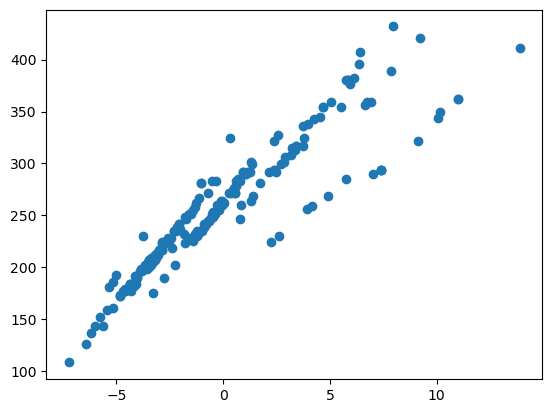

In [20]:
import matplotlib.pyplot as plt
plt.scatter(x_test,y_test)


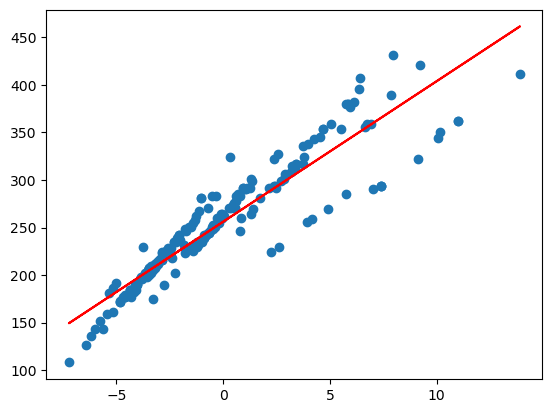

In [23]:
import matplotlib.pyplot as plt
plt.scatter(x_test,y_test)
plt.plot(x_test,lr.coef_[0] * x_test + lr.intercept_, c = 'r') #y = m x + c 